In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Breast_cancer_data.csv')

In [ ]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
data.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [ ]:
print('Dataset :',data.shape)
x = data.iloc[:, [0, 1, 2, 3]].values
data.info()
data[0:10]

Dataset : (569, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


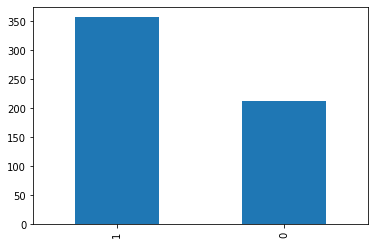

In [ ]:
data.diagnosis.value_counts()[0:30].plot(kind='bar')
plt.show()

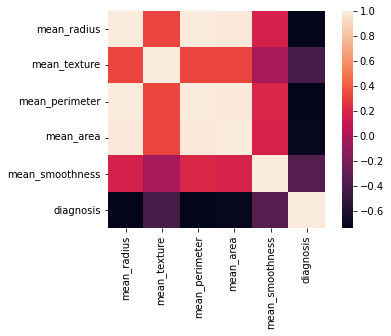

In [ ]:
data = data[['mean_radius','mean_texture','mean_perimeter','mean_area', 'mean_smoothness','diagnosis']] #Subsetting the data
cor = data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

As you can see above, we obtain the heatmap of correlation among the variables. The color palette in the side represents the amount of correlation among the variables. The lighter shade represents a high correlation.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


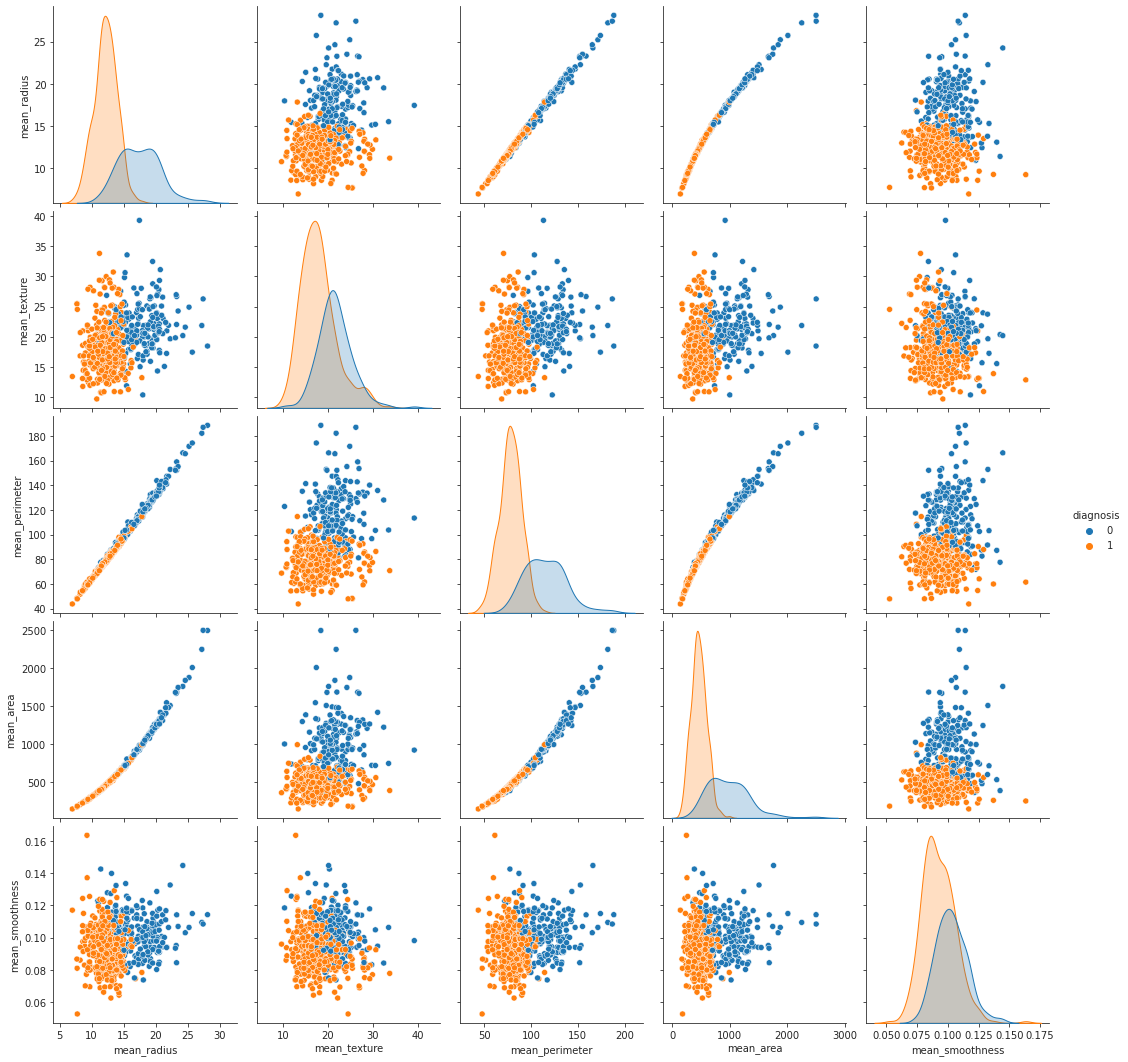

In [ ]:
sns.set_style("ticks")
sns.pairplot(data,hue="diagnosis",size=3);
plt.show()

Data for training and testing To select a set of training data that will be input in the Machine Learning algorithm, to ensure that the classification algorithm training can be generalized well to new data. For this study using a sample size of 20%, assumed it ideal ratio between training and testing

# **Modelling**

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

*Split data into training and* *testing*

In [ ]:
Y = data['diagnosis']
X = data.drop(columns=['diagnosis'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [ ]:
X_train

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
361,13.30,21.57,85.24,546.1,0.08582
511,14.81,14.70,94.66,680.7,0.08472
438,13.85,19.60,88.68,592.6,0.08684
150,13.00,20.78,83.51,519.4,0.11350
236,23.21,26.97,153.50,1670.0,0.09509
...,...,...,...,...,...
125,13.85,17.21,88.44,588.7,0.08785
56,19.21,18.57,125.50,1152.0,0.10530
501,13.82,24.49,92.33,595.9,0.11620
348,11.47,16.03,73.02,402.7,0.09076


In [ ]:
X_test

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
91,15.370,22.76,100.20,728.2,0.09200
40,13.440,21.58,86.18,563.0,0.08162
70,18.940,21.31,123.60,1130.0,0.09009
106,11.640,18.33,75.17,412.5,0.11420
97,9.787,19.94,62.11,294.5,0.10240
...,...,...,...,...,...
269,10.710,20.39,69.50,344.9,0.10820
309,13.050,13.84,82.71,530.6,0.08352
273,9.742,15.67,61.50,289.9,0.09037
336,12.990,14.23,84.08,514.3,0.09462


In [ ]:
Y_train

361    1
511    1
438    1
150    1
236    0
      ..
125    1
56     0
501    0
348    1
382    1
Name: diagnosis, Length: 455, dtype: int64

In [ ]:
Y_test

91     0
40     0
70     0
106    1
97     1
      ..
269    1
309    1
273    1
336    1
258    0
Name: diagnosis, Length: 114, dtype: int64

In [ ]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (455, 5)
Y train shape:  (455,)
X test shape:  (114, 5)
Y test shape:  (114,)


# **Logistic Regression**
*Logistic Regression: it is used for predictiong the categorical dependent variable using given set of independent variables. - It predicts the output of categorical dependent variable. - outcome must be categorical or discrete value. it can be either yes or no, 0 or 1, true or false*



In [ ]:
# We defining the model
logreg = LogisticRegression(C=10)

# We train the model
logreg.fit(X_train, Y_train)

# We predict target values
Y_predict1 = logreg.predict(X_test)

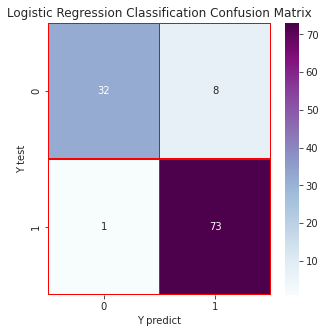

In [ ]:
# The confusion matrix
logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
# Test score
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

0.9210526315789473


In [ ]:
#precision and recall
average_precision = average_precision_score(Y_test, Y_predict1)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.90


# **Naive baiyes**
*The naive Bayesian classifier is a probabilistic classifier based on Bayes' theorem with strong independence assumptions between the features.*

In [ ]:
# We define the model
nbcla = GaussianNB()

# We train model
nbcla.fit(X_train, Y_train)

# We predict target values
Y_predict3 = nbcla.predict(X_test)

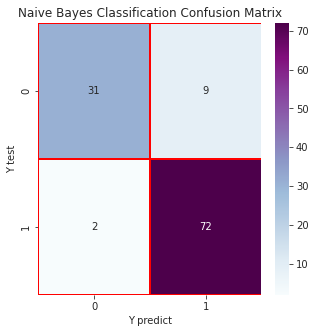

In [ ]:
# The confusion matrix
nbcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
# Test score
score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

0.9035087719298246


In [ ]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict3)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.88


# **Desicion Tree**
A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome.

In [ ]:
# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(X_train, Y_train)

# We predict target values
Y_predict4 = dtcla.predict(X_test)

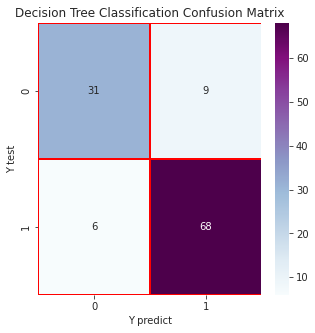

In [ ]:
# The confusion matrix
dtcla_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
# Test score
score_dtcla = dtcla.score(X_test, Y_test)
print(score_dtcla)

0.868421052631579


In [ ]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict4)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.86


# **Random forest classification**
Based on the previous classification method, random forest is a supervised learning algorithm that creates a forest randomly. This forest, is a set of decision trees, most of the times trained with the bagging method.

In [ ]:
# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

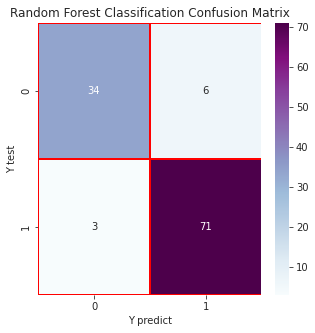

In [ ]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()


In [ ]:
# Test score
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

0.9210526315789473


In [ ]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict5)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.91


# **K-Nearest Neighbor classification**
K-Nearest neighbors is a technique that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions)

In [ ]:
# We define the model
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
knncla.fit(X_train, Y_train)

# We predict target values
Y_predict6 = knncla.predict(X_test)

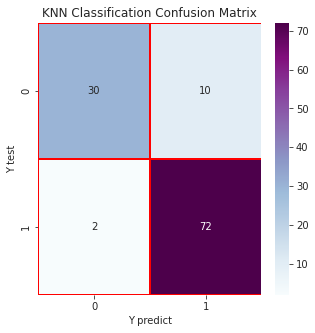

In [ ]:
# The confusion matrix
knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()


In [ ]:
# Test score
score_knncla= knncla.score(X_test, Y_test)
print(score_knncla)

0.8947368421052632


In [ ]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict6)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.87


# **Conclusion**
 Comparison of classification techniques, we can evaluate that here Logistic Regression Classification and Random Forest have the most optimal result of the accuracy.